In [12]:
import pandas as pd
import numpy as np
import yfinance as yf

In [13]:
# Get the data from yahoo finance
data = yf.download("TLT", start="2004-01-01", end="2024-06-30")
#Prepare the data
data["log_return"] = np.log(data["Adj Close"] / data["Adj Close"].shift(1))
data["day_of_month"] = data.index.day

data["year"] = data.index.year

[*********************100%%**********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/yfinance/utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


<Axes: title={'center': 'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

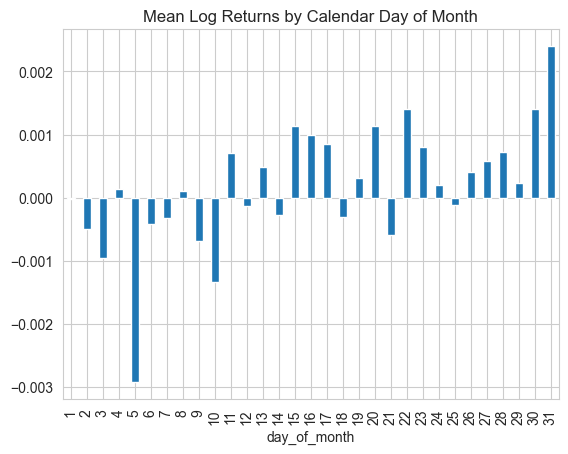

In [14]:
grouped_by_day = data.groupby("day_of_month").log_return.mean()
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

In [15]:
# Strategy
data["first_week_returns"] = 0.0
data.loc[data.day_of_month <= 7, "first_week_returns"] = data[
    data.day_of_month <= 7].log_return

data["last_week_returns"] = 0.0
data.loc[data.day_of_month >= 23, "last_week_returns"] = data[
    data.day_of_month >= 23
].log_return

data["last_week_less_first_week"] = data.last_week_returns - data.first_week_returns

<Axes: title={'center': 'Mean Log Strategy Returns by Year'}, xlabel='year'>

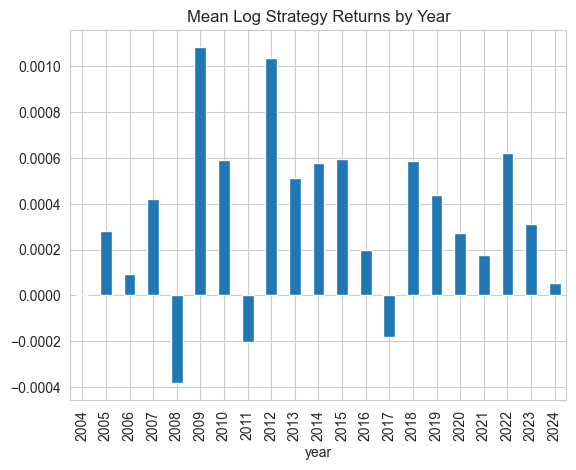

In [16]:
(
    data.groupby("year")
    .last_week_less_first_week.mean()
    .plot.bar(title="Mean Log Strategy Returns by Year")
)

<Axes: title={'center': 'Total Returns By Year'}, xlabel='year'>

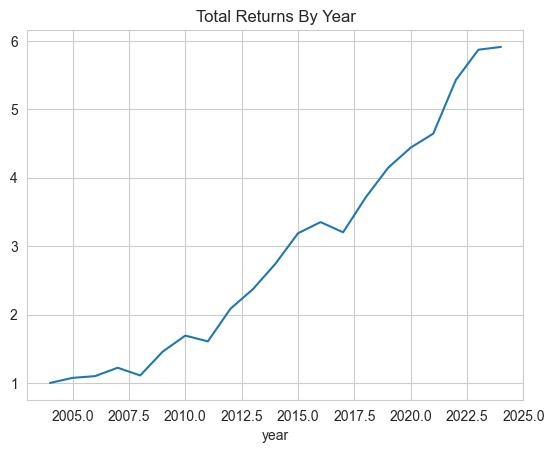

In [29]:
# Calculate the cumulative returns
(
    np.exp(
        data.groupby("year")
        .last_week_less_first_week.sum()
        .cumsum()
    )
    .plot(title="Total Returns By Year")
)

<Axes: title={'center': 'Cumulative Returns By Day'}, xlabel='Date'>

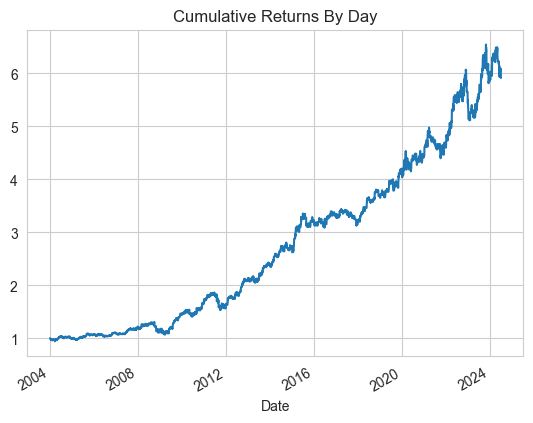

In [25]:

np.exp(data.last_week_less_first_week.cumsum()).plot(title="Cumulative Returns By Day")

[*********************100%%**********************]  1 of 1 completed


/opt/homebrew/Caskroom/miniforge/base/envs/py312/lib/python3.12/site-packages/yfinance/utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


<Axes: title={'center': 'Cumulative Sum of Returns for SPY'}, xlabel='Date'>

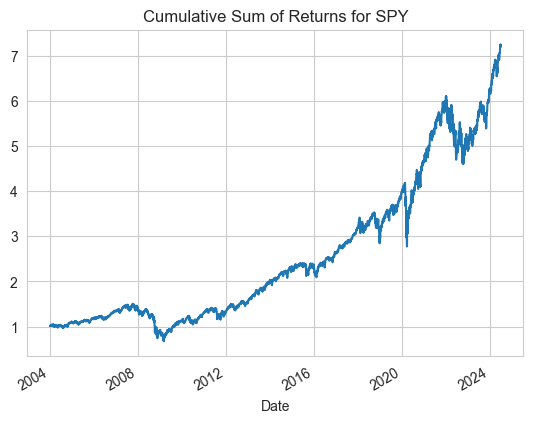

In [26]:
# compare the strategy to just buy and hold SPY
spy = yf.download("SPY", start="2004-01-01", end="2024-06-30")
spy["log_return"] = np.log(spy["Adj Close"] / spy["Adj Close"].shift(1))
np.exp(spy.log_return.cumsum()).plot(title="Cumulative Sum of Returns for SPY")

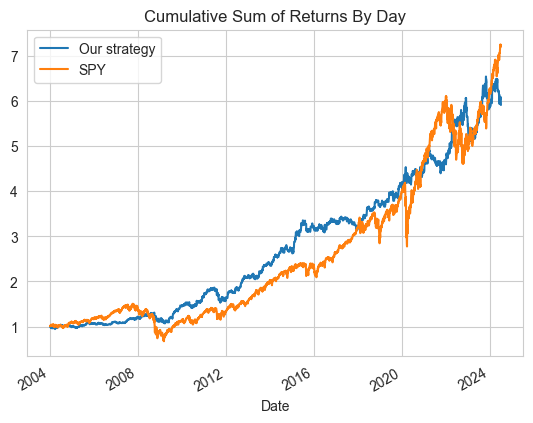

In [28]:
# Plot the cumulative returns of the strategy and SPY
ax = np.exp(data.last_week_less_first_week.cumsum()).plot(
    title="Cumulative Sum of Returns By Day", label="Our strategy"
)
np.exp(spy.log_return.cumsum()).plot(ax=ax, label="SPY")
# Add legend
ax.legend()

# Show the plot
# plt.show()
